/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
[-1, -2, -3]


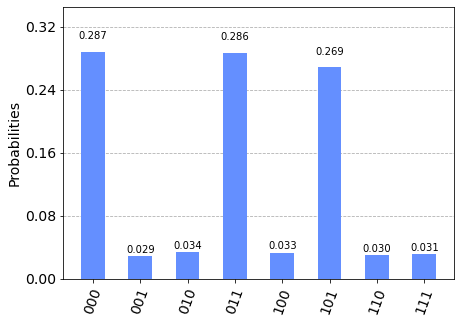

In [49]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''


oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['assignment'])


plot_histogram(result['measurement'])

# Again...

In [36]:
from qiskit import QuantumCircuit
import numpy as np
noQubit = 3
noCbit  = noQubit
qc = QuantumCircuit(noQubit, noQubit)
#1. Init; Turn all Qubits to superposition
setHadGate(qc, noQubit) 
qc.barrier()
#2. Oracle; a blackbox "designed" by dataset designer

qc.barrier()
#3. Amplifier

#setHadGate(qc, noQubit) 
setDiffuser(qc, noQubit)
qc.barrier()
setMeasure(qc, noQubit)


qc.draw()

┌───┐ ░  ░ ┌───┐┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐      ░ ┌─┐      
q_0: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░─┤M├──────
     ├───┤ ░  ░ ├───┤├───┤├───┤├───┤├───┤  │  ├───┤├───┤      ░ └╥┘┌─┐   
q_1: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░──╫─┤M├───
     ├───┤ ░  ░ ├───┤├───┤├───┤└───┘└───┘┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├──────────┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ░ └───┘└───┘└───┘          └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════════╩══╩══╩═
                                                                 0  1  2

In [ ]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
plot_histogram(result.get_counts())

In [32]:
def setHadGate(qc, noQubit):#assign Hadamard gate to all qubit
    for i in range(noQubit): 
        qc.h(i)
def setMeasure(qc, noQubit):
    qc.measure(np.linspace(0,noQubit-1,noQubit, dtype=int)
,np.linspace(0,noQubit-1,noQubit, dtype=int)
)

def setDiffuser(qc, noQubit):
    setHadGate(qc, noQubit)
    for i in range(noQubit): 
        qc.x(i)
    for i in range(noQubit-1): 
        qc.x(i)
    setHadGate(qc, noQubit-1)
    qc.mct(list(range(noQubit-1)), noQubit-1)
    qc.h(noQubit-1)
    for i in range(noQubit): 
        qc.x(i)
    setHadGate(qc, noQubit)


### Implementation of Grover's Search Algo

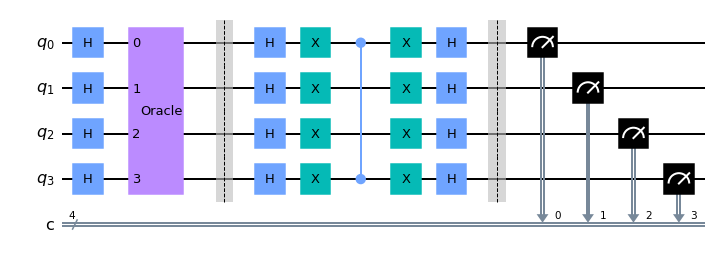

In [152]:
#Import libraries from qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator

noQubit = 4
winner = int('0000', 2)

q = QuantumRegister(noQubit, 'q')
c = ClassicalRegister(noQubit, 'c')
qc = QuantumCircuit(q,c)

#1. Init; Turn all Qubits to superposition
qc.h(q) #Turn all qubits to superposition


#2. Oracle; a blackbox "implemented" by dataset/f(x) designer
oracleNp=np.identity(2**noQubit, dtype=complex)
oracleNp[winner,winner] = -1 #Turn the winner to -1
oracle=Operator(oracleNp)
qc.unitary(oracle, [i for i in range(noQubit)], label='Oracle')


#3. Amplifier
qc.barrier(q)
qc.h(q)
qc.x(q)
qc.cz(q[-1],q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)


qc.measure(q,c)

qc.draw(output='mpl')




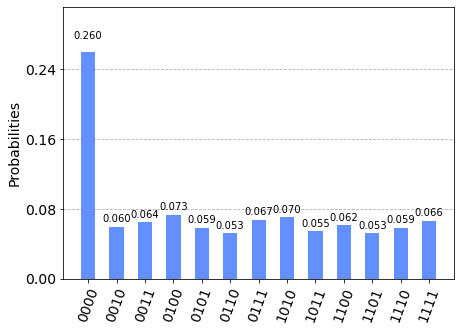

In [153]:
# Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()

#print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Grover second method

In [626]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

def oracle(noQubit, winners, name = "U$_o$"):
    qc= QuantumCircuit(noQubit, name=name)
    oracleNp=np.identity(2**noQubit, dtype=complex)
    for i in winners:
        oracleNp[i,i] = -1 #Turn the winner to -1
    oracle=Operator(oracleNp)
    qc.unitary(oracle, [i for i in range(noQubit)], label='Oracle')
    return qc
'''
def diffuser(noQubit, name = 'U$_f$'):
    qc = QuantumCircuit(noQubit, name = name)
    qc.h(range(noQubit))
    qc.append(oracle(noQubit,[0]),range(noQubit))
    qc.h(range(noQubit))
    return qc
'''
def diffuser(nqubits, name = 'U$_f$'):
    qc = QuantumCircuit(nqubits, name = name)
    qc.h(range(nqubits))
    qc.x(range(nqubits))

    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  #toffoli
    qc.h(nqubits-1)
    
    qc.x(range(nqubits))
    qc.h(range(nqubits))
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

def grover(noQubit, winners, loopTime=None):
    qc = QuantumCircuit(noQubit,noQubit)
    qc.h(range(noQubit))
    if loopTime==None:
        loopTime = int(np.ceil(np.sqrt(n/len(winners))))

    for i in range(loopTime):
        qc.append(oracle(noQubit,winners),range(noQubit))
        qc.append(diffuser(noQubit), range(noQubit))
    qc.measure(range(noQubit),range(noQubit))
    return qc


In [739]:
n = 8
#x = int('01', 2)
winners = [10]
qc = grover(n, winners,6)
#qc.draw()
#fig, ax = plt.subplots(ncols=1, figsize=(15,6))
#qc.draw(output='mpl', ax=ax)
#fig.savefig('result/circuit'+str(n)+'qb_'+str(winner)+'win.png')

In [740]:
backend = Aer.get_backend('qasm_simulator')
myshot=10
result = execute(qc, backend, shots=myshot).result()
counts = result.get_counts(qc)
#print(counts)
#print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
fig, ax = plt.subplots(ncols=1, figsize=(15,6))

plot_histogram(counts, ax=ax)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['|'+str(int(lab,2))+'>' for lab in labels]
ax.set_xticklabels(labels)
ax.set_title("No. of shot = "+ str(myshot))
fig.tight_layout()
#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')
#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Different Shot simulation

In [798]:
backend = Aer.get_backend('qasm_simulator')

#print(counts)
#print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
mycols = 10
myrows = 10

n = 8
#x = int('01', 2)
winners = [8]
myProb = []
plt.close('all')
fig, ax = plt.subplots(nrows=myrows,ncols=mycols, figsize=(15,10))
myshot=1
j=0
for i in range(0,mycols*myrows):
    qc = grover(n, winners,i+1)
    result = execute(qc, backend, shots=10).result()
    counts = result.get_counts(qc)
    '''
    plot_histogram(counts, ax=ax[j,i%mycols])
    labels = [item.get_text() for item in ax[j,i%mycols].get_xticklabels()]
    labels = ['|'+str(int(lab,2))+'>' for lab in labels]
    ax[j,i%mycols].set_xticklabels(labels)
    ax[j,i%mycols].set_title("No. of Iteration = "+ str(i+1))
    '''
    if i!=0 and i%mycols==(mycols-1):
        j=j+1
    if '{0:08b}'.format(n) not in counts:
        myProb.append(0)
    else:
        myProb.append(float(counts['{0:08b}'.format(n)])/sum(counts.values()))
fig.tight_layout()

#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')
#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [799]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
ax.plot(myProb)
ax.set_ylabel('Probability')
ax.set_xlabel('Grover iteration')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Grover iteration')

In [787]:
myProb = []
n=4
if '{0:08b}'.format(n) not in counts:
    myProb.append(0)
else:
    myProb.append(float(counts['{0:08b}'.format(n)])/sum(counts.values()))

0.2


5

## Different Shot simulation

In [687]:
backend = Aer.get_backend('qasm_simulator')

#print(counts)
#print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
mycols = 4
myrows = 2
plt.close('all')
fig, ax = plt.subplots(nrows=myrows,ncols=mycols, figsize=(15,10))
shotArry=[1,2,4,8,16,32,64,128]
myshot=1
j=0
for i in range(0,mycols*myrows):
    
    result = execute(qc, backend, shots=shotArry[i]).result()
    counts = result.get_counts(qc)
    plot_histogram(counts, ax=ax[j,i%mycols])
    labels = [item.get_text() for item in ax[j,i%mycols].get_xticklabels()]
    labels = ['|'+str(int(lab,2))+'>' for lab in labels]
    ax[j,i%mycols].set_xticklabels(labels)
    ax[j,i%mycols].set_title("No. of shot = "+ str(shotArry[i]))
    if i!=0 and i%mycols==(mycols-1):
        j=j+1
fig.tight_layout()

#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')
#fig.savefig('result/result'+str(n)+'qb_'+str(winner)+'win.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [606]:
from matplotlib.gridspec import GridSpec
n = 3
#x = int('01', 2)
winners = [2]
qc = grover(n, winners)
qc.draw()
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
gs = GridSpec(nrows=1, ncols=7)
ax0 = fig.add_subplot(gs[0, :3])
qc.draw(output='mpl', ax=ax0)

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=102).result()
counts = result.get_counts(qc)

ax1 = fig.add_subplot(gs[0, 4:])
plot_histogram(counts, ax=ax1)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = ['|'+lab+'>' for lab in labels]
ax1.set_xticklabels(labels)
fig.tight_layout()
fig.show()
#fig.savefig('result/circuit'+str(n)+'qb_'+str(winner)+'win.png')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-606-30d9ced5f950>:21: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()


In [507]:
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['|'+lab+'>' for lab in labels]
ax.set_xticklabels(labels)

[Text(0.0, 0, '|||000>>>'),
 Text(1.0, 0, '|||001>>>'),
 Text(2.0, 0, '|||010>>>'),
 Text(3.0, 0, '|||011>>>'),
 Text(4.0, 0, '|||100>>>'),
 Text(5.0, 0, '|||101>>>'),
 Text(6.0, 0, '|||110>>>'),
 Text(7.0, 0, '|||111>>>')]

In [ ]:
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))